In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn

In [2]:
def quant(x, alpha, bits):
    qmax = 2 ** bits - 1
    qmin = 0
    
    delta = 2 * alpha / qmax
    
    tq = (x + alpha) / delta
    tq = torch.clamp(tq, qmin, qmax)
    tq = torch.round(tq)
    tq = tq * delta - alpha
    
    return tq

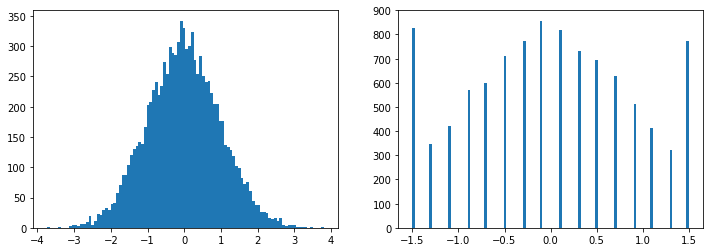

In [11]:
np.random.seed(0)
plt.rcParams['figure.figsize'] = [12, 4]
x = torch.tensor(np.random.normal(size=10000), dtype=torch.float).cuda()
plt.subplot(1, 2, 1)
plt.hist(x.cpu().flatten(), bins=100);
plt.subplot(1, 2, 2)
xq = quant(x, 1.5, 4)
plt.hist(xq.cpu().flatten(), bins=100);

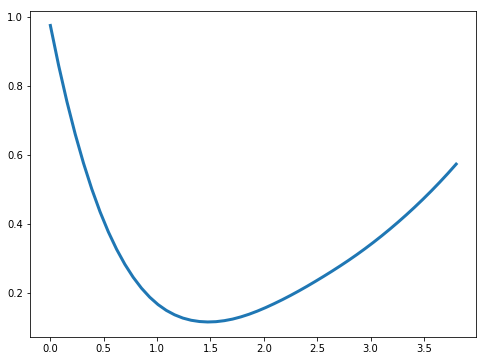

In [15]:
plt.rcParams['figure.figsize'] = [8, 6]
loss = torch.nn.MSELoss()
clips = np.linspace(0., x.max().item(), 50)
plt.plot(clips, [loss(x, quant(x, c, bits=2)).item() for c in clips], linewidth=3);

In [19]:
c = torch.nn.Parameter(x.new_tensor([3.]))
criterion = nn.MSELoss()
c

Parameter containing:
tensor([3.], device='cuda:0', requires_grad=True)